<a href="https://colab.research.google.com/github/poandpo/project-/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#기본 데이터 전처리

In [1]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [1]:
import pandas as pd

df= pd.read_csv('vgames2.csv', index_col=0) #df로 파일 불러오는데 인덱스를 숫자 있는 열(0행)로 지정
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [2]:
df.isnull().sum() # 결측치 확인
df['Year']=df['Year'].fillna(0).replace('N/A',0).astype(int) # Year 피쳐에 결측지 0으로 대체하고 N/A를 0으로 대체하고 정수형 타입으로 변환
df[['Genre','Publisher' ]]=df[['Genre','Publisher' ]].fillna('unknown') #Genre,Publisher 피쳐의 결측치를 unknown으로 대체
#df['Platform']=df['Platform'].replace('챕','e') 



In [3]:
def value_to_float(x):
    if 'K' in x:
       return float(x.replace('K', '')) * 0.001
    elif 'M' in x: 
       return float(x.replace('M', ''))
    else:
       return float(x)

df['NA_Sales']=df['NA_Sales'].apply(value_to_float)
df['EU_Sales']=df['EU_Sales'].apply(value_to_float)
df['JP_Sales']=df['JP_Sales'].apply(value_to_float)
df['Other_Sales']=df['Other_Sales'].apply(value_to_float)
#출고량 피쳐에서 'M'을 빼고 정수형으로 바꾸고, 'K'를 빼고 0,0001를 곱하여 단위를 맞춤

In [4]:
df.dtypes #타입 잘 바뀌었는지 확인

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [5]:
def value_to_year(x):
   if x in range(1,20):
      return x + 2000  
   elif x in range(80,100):
      return x + 1900   
   else :   
      return x

df['Year']=df['Year'].apply(value_to_year) # 97이나 9같은 한 두자리 숫자를 1997,2009으로 바꿈

In [6]:
df['Year'].iloc[81] # 잘 바뀌었는지 확인

1997

#지역에 따라서 선호하는 게임 장르가 다를까
1. 장르별로 모아서 각 나라의 출고량의 총합들 계산
2. 총합 시각화

In [7]:
df['Genre'].value_counts(dropna = False) # 장르별 빈도 

Action          3305
Sports          2341
Misc            1734
Role-Playing    1483
Shooter         1308
Adventure       1280
Racing          1243
Platform         884
Simulation       865
Fighting         847
Strategy         680
Puzzle           578
unknown           50
Name: Genre, dtype: int64

In [8]:
df_g= df.sort_values(by=['Genre'], axis=0).reset_index(drop=True)[['Genre','NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales' ]]


In [145]:
df_g.dtypes

Genre           object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [152]:
a=df_g[df_g['Genre'].isin(['Action'])].sum()
b=df_g[df_g['Genre'].isin(['Sports'])].sum()
c=df_g[df_g['Genre'].isin(['Misc'])].sum()
d=df_g[df_g['Genre'].isin(['Role-Playing'])].sum()
e=df_g[df_g['Genre'].isin(['Shooter'])].sum()
f=df_g[df_g['Genre'].isin(['Adventure'])].sum()
g=df_g[df_g['Genre'].isin(['Racing'])].sum()
h=df_g[df_g['Genre'].isin(['Platform'])].sum()
i=df_g[df_g['Genre'].isin(['Simulation'])].sum()
j=df_g[df_g['Genre'].isin(['Fighting'])].sum()
k=df_g[df_g['Genre'].isin(['Strategy'])].sum()
l=df_g[df_g['Genre'].isin(['Puzzle'])].sum()


In [153]:
df_g_to=pd.concat([a,b,c,d,e,f,g,h,i,j,k,l], axis=1) # 평균 구한것을 합쳐주기
df_g_to.columns=['Action','Sport','Misc','Role-Playing','Shooter','Adventure','Racing','Platform','Simulation','Fighting','Strategy','Puzzle']
# 컬럼명을 변경
df_g_to=df_g_to.T.drop(columns='Genre') #행과 열 전환
df_g_to

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Action,874.81,522.16,157.9,186.45
Sport,680.52,376.48,135.37,134.67
Misc,408.05,212.36,105.27,74.04
Role-Playing,319.54,183.58,344.95,56.96
Shooter,581.92,313.05,38.28,102.65
Adventure,105.66,64.05,51.95,16.81
Racing,357.19,237.1,56.4,77.1
Platform,446.44,201.61,130.65,51.53
Simulation,182.96,113.35,63.7,31.48
Fighting,223.2,101.22,87.34,36.64


In [44]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (48.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and di

In [165]:
df_g_to.iloc[:,1]

Action          522.16
Sport           376.48
Misc            212.36
Role-Playing    183.58
Shooter         313.05
Adventure        64.05
Racing           237.1
Platform        201.61
Simulation      113.35
Fighting        101.22
Strategy         45.32
Puzzle           50.73
Name: EU_Sales, dtype: object

In [12]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')  

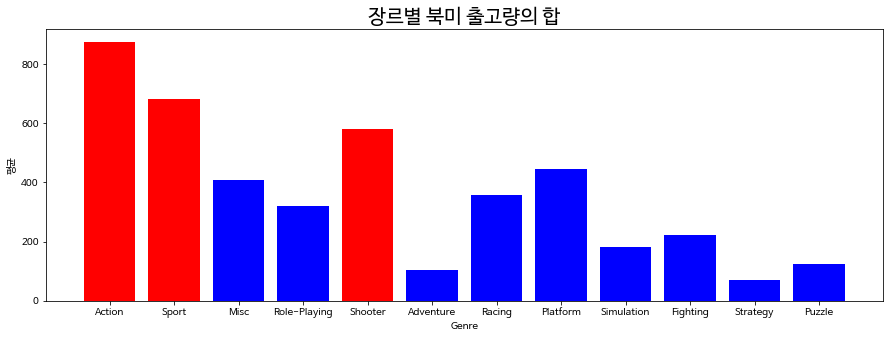

In [176]:
area_category=['Action','Sport','Misc','Role-Playing','Shooter','Adventure','Racing','Platform','Simulation','Fighting','Strategy','Puzzle']

plt.figure(figsize=(15,5))

xtick_label_position = list(range(len(area_category))) ## x축 눈금 라벨이 표시될 x좌표
plt.xticks(xtick_label_position, area_category)
colors=['r','r','b','b','r','b','b','b','b','b','b','b']

plt.bar(xtick_label_position, df_g_to.iloc[:,0], color=colors)

plt.title('장르별 북미 출고량의 합',fontsize=20) ## 타이틀 출력
plt.xlabel('Genre') ## x축 라벨 출력
plt.ylabel('평균') ## y축 라벨 출력
plt.show()

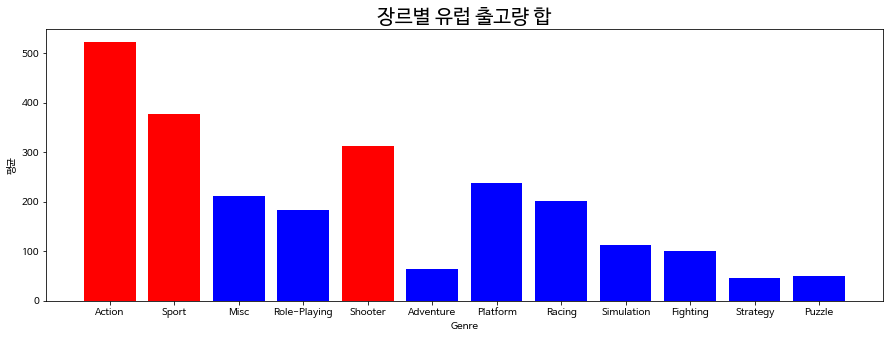

In [179]:
area_category=['Action','Sport','Misc','Role-Playing','Shooter','Adventure','Platform','Racing','Simulation','Fighting','Strategy','Puzzle']

plt.figure(figsize=(15,5))

xtick_label_position = list(range(len(area_category))) ## x축 눈금 라벨이 표시될 x좌표
plt.xticks(xtick_label_position, area_category)
colors=['r','r','b','b','r','b','b','b','b','b','b','b']

plt.bar(xtick_label_position, df_g_to.iloc[:,1], color=colors)

plt.title('장르별 유럽 출고량 합',fontsize=20) ## 타이틀 출력
plt.xlabel('Genre') ## x축 라벨 출력
plt.ylabel('평균') ## y축 라벨 출력
plt.show()

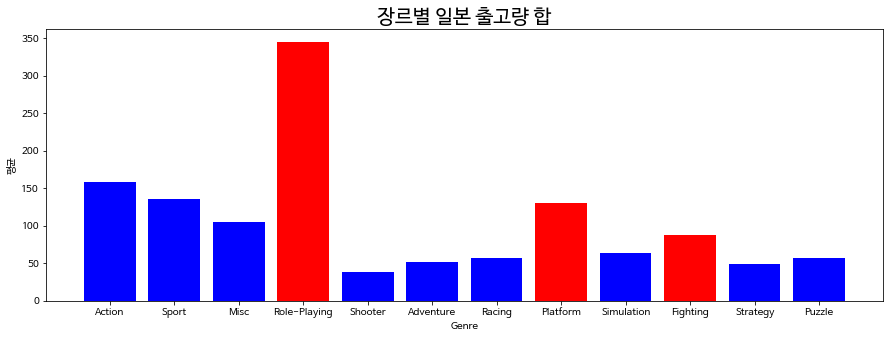

In [180]:
area_category=['Action','Sport','Misc','Role-Playing','Shooter','Adventure','Racing','Platform','Simulation','Fighting','Strategy','Puzzle']

plt.figure(figsize=(15,5))

xtick_label_position = list(range(len(area_category))) ## x축 눈금 라벨이 표시될 x좌표
plt.xticks(xtick_label_position, area_category)
colors=['b','b','b','r','b','b','b','r','b','r','b','b']

plt.bar(xtick_label_position, df_g_to.iloc[:,2], color=colors)

plt.title('장르별 일본 출고량 합',fontsize=20) ## 타이틀 출력
plt.xlabel('Genre') ## x축 라벨 출력
plt.ylabel('평균') ## y축 라벨 출력
plt.show()

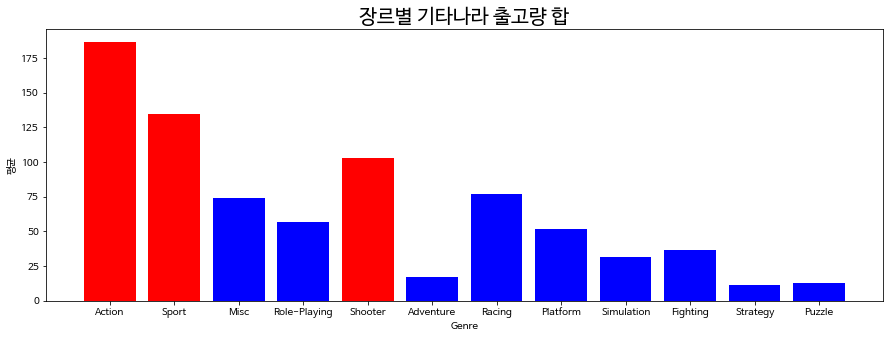

In [182]:
area_category=['Action','Sport','Misc','Role-Playing','Shooter','Adventure','Racing','Platform','Simulation','Fighting','Strategy','Puzzle']

plt.figure(figsize=(15,5))

xtick_label_position = list(range(len(area_category))) ## x축 눈금 라벨이 표시될 x좌표
plt.xticks(xtick_label_position, area_category)
colors=['r','r','b','b','r','b','b','b','b','b','b','b']

plt.bar(xtick_label_position, df_g_to.iloc[:,3], color=colors)

plt.title('장르별 기타지역 출고량 합',fontsize=20) ## 타이틀 출력
plt.xlabel('Genre') ## x축 라벨 출력
plt.ylabel('평균') ## y축 라벨 출력
plt.show()

북미와 유럽은 action, sport, shooter을 선호하는 반면,
일본은 Role-playing이 압도적으로 선호하는 것을 알 수 있다.

**가설1: 지역별 출고량의 총합들은 유사하다**

In [185]:
df_g_to_sum=df_g_to.sum()
df_g_to_sum

NA_Sales       4372.34
EU_Sales       2421.01
JP_Sales       1278.14
Other_Sales     792.21
dtype: float64

In [186]:
from scipy.stats import chisquare

chi1 = chisquare(df_g_to_sum, axis=None)
chi1

Power_divergenceResult(statistic=3429.0829413901647, pvalue=0.0)

Pvalue가 0.05로 귀무가설을 기각될 가능성이 높으므로 즉, 지역별 출고량의 총합들은 유사하지 않다.

**가설2: 지역별 출고량과 장르가 독립적이다**

In [187]:
from scipy.stats import chi2_contingency

chi2 = chi2_contingency()
chi2

(696.7959761665446,
 2.5083350323476615e-125,
 33,
 array([[858.96895075, 475.6200157 , 251.09725564, 155.6337779 ],
        [654.61038546, 362.46455886, 191.35833857, 118.6067171 ],
        [394.49075948, 218.43362447, 115.31912416,  71.47649189],
        [446.43871862, 247.19774815, 130.50476034,  80.88877289],
        [510.99507046, 282.94326963, 149.37613254,  92.58552738],
        [117.63393614,  65.13513033,  34.38722495,  21.31370858],
        [359.00869034, 198.78683483, 104.94686312,  65.04761171],
        [409.54091837, 226.76705352, 119.71864709,  74.20338101],
        [193.11657509, 106.93065028,  56.45261331,  34.99016132],
        [221.18948701, 122.47491273,  64.65899974,  40.07660052],
        [ 86.24614163,  47.75538301,  25.21181872,  15.62665663],
        [120.10036664,  66.50081847,  35.10822183,  21.76059306]]))

Pvalue가 0.05로 귀무가설을 기각될 가능성이 높으므로 즉, 장르와 지역별 출고량이 독립적이지 않다. 즉, 둘은 연관이 되어있음을 알수 있다

##총정리

시각화된 자료를 통해서 미국과 유럽은 비슷하나 일본은 매우 다르고, 가설 검증을 통해서 지역별 출고량과 장르가 연관이 되어있다. 

**즉, 지역에 따라서 선호하는 게임의 장르가 다르다는 것을 알 수 있다.**